In [ ]:
# 📌 1. Setup & Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Ariyaan/---Depression Screening and Lifestyle Survey Using PHQ-9  (Responses) - Form Responses 1.csv'  # change path
df = pd.read_csv(file_path)
df.head()

,Timestamp,Name (নাম),Age (বয়স),Gender (লিঙ্গ),"Over the last two weeks, how often have you had little interest or pleasure in doing things you usually enjoy?\n(গত দুই সপ্তাহে আপনি কি আপনার পছন্দের কাজগুলোতে আগ্রহ বা আনন্দ কম অনুভব করেছেন?)","Over the last two weeks, how often have you felt down, depressed, or hopeless?\n(গত দুই সপ্তাহে আপনি কতবার মন খারাপ, হতাশ, বা নিরাশ অনুভব করেছেন?)","Over the last two weeks, Have you had trouble falling asleep, staying asleep, or sleeping too much?\n(গত দুই সপ্তাহ ধরে ঘুমাতে সমস্যা, ঘুম ভেঙে যাওয়া, অথবা অতিরিক্ত ঘুমানোর সমস্যায় ভুগছেন?)","During this time, Have you been feeling tired or lacking energy even after rest?\n( এই সময়ের ভেতর, আপনি কি বিশ্রামের পরেও ক্লান্ত বা শক্তিহীন অনুভব করেছেন?)","Have you noticed a decrease in appetite or have you been overeating?\n(গত দুই সপ্তাহের মধ্যে, আপনার কি ক্ষুধা কমে গেছে বা আপনি কি স্বাভাবিকের চেয়ে বেশি খাচ্ছেন?)",Have you been feeling bad about yourself — such as feeling like a failure or that you’ve let others down?\n(আপনি কি নিজের প্রতি খারাপ অনুভব করছেন — যেমন নিজেকে ব্যর্থ মনে করা বা পরিবারের কাউকে হতাশ করা মনে হওয়া?),...,"Have you had thoughts that you would be better off dead or of harming yourself in some way?\n(আপনার কি কখনও মনে হয়েছে আপনি যদি না থাকতেন তবে ভালো হতো, অথবা আপনি নিজের ক্ষতি করতে চেয়েছেন?)",What best describes your current employment status?\n(বর্তমানে আপনি কোন ধরণের পেশাগত অবস্থানে রয়েছেন?),How frequently do you experience stress or pressure due to your work or studies?\n(কাজ বা পড়াশোনার কারণে আপনি কতবার চাপ অনুভব করেন?),How satisfied are you with your current job or academic situation?\n(বর্তমানে আপনার চাকরি বা একাডেমিক অবস্থা নিয়ে আপনি কতটা সন্তুষ্ট?),"On average, how many hours do you sleep each night?\n(গড়ে প্রতিদিন আপনি কত ঘণ্টা ঘুমান?)",How would you rate your current dietary habits?\n(বর্তমানে আপনার খাদ্যাভ্যাসকে আপনি কীভাবে মূল্যায়ন করবেন?),"On average, how many hours per day do you spend working or studying?\n(প্রতিদিন আপনি গড়ে কত ঘণ্টা কাজ বা পড়াশোনায় ব্যয় করেন?)",How often do you feel stressed about your financial or mental well-being?\n(আপনি কতবার আপনার আর্থিক বা মানসিক স্বাস্থ্যের বিষয়ে চাপ অনুভব করেন?),"Does your family have a known history of mental health conditions (e.g., depression, anxiety, bipolar disorder)?\n(আপনার পরিবারের মধ্যে কি কারো মানসিক রোগের (যেমন: বিষণ্নতা, দুশ্চিন্তা, বাইপোলার ডিজঅর্ডার) ইতিহাস রয়েছে?)",Have you ever experienced thoughts of self-harm or suicide?\n(আপনি কি কখনও আত্ম-আঘাত বা আত্মহত্যার চিন্তা করেছেন?)
0,7/26/2025 16:05:55,Towhid Hasan,25,Male (পুরুষ),Several days (কয়েক দিন),More than half the days (অর্ধেকের বেশি দিন),Several days (কয়েক দিন),Not at all (একদম না),Not at all (একদম না),Not at all (একদম না),...,Not at all (একদম না),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7/26/2025 16:07:12,Fatin Ishraque,24,Male (পুরুষ),Several days (কয়েক দিন),Nearly every day (প্রায় প্রতিদিন),Nearly every day (প্রায় প্রতিদিন),Several days (কয়েক দিন),More than half the days (অর্ধেকের বেশি দিন),Not at all (একদম না),...,Not at all (একদম না),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7/26/2025 16:07:52,Ayon,25,Male (পুরুষ),Several days (কয়েক দিন),More than half the days (অর্ধেকের বেশি দিন),More than half the days (অর্ধেকের বেশি দিন),Nearly every day (প্রায় প্রতিদিন),Nearly every day (প্রায় প্রতিদিন),More than half the days (অর্ধেকের বেশি দিন),...,Not at all (একদম না),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7/26/2025 16:08:27,Al-Amin,25,Male (পুরুষ),More than half the days (অর্ধেকের বেশি দিন),Nearly every day (প্রায় প্রতিদিন),Several days (কয়েক দিন),Several days (কয়েক দিন),More than half the days (অর্ধেকের বেশি দিন),More than half the days (অর্ধেকের বেশি দিন),...,Nearly every day (প্রায় প্রতিদিন),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7/26/2025 16:08:30,Ishraque,22,Male (পুরুষ),More than half the days (অর্ধেকের বেশি দিন),More than half the days (অর্ধেকের বেশি দিন),Several days (কয়েক দিন),More than half the days (অর্ধেকের বেশি দিন),Nearly every day (প্রায় প্রতিদিন),Several days (কয়ে

In [ ]:
import re

# Remove anything inside () along with the brackets
def clean_column(col):
    # Remove anything inside () along with the brackets, Bengali characters, newline, and question mark
    return re.sub(r"\(.*?\)|[\u0980-\u09FF]|\n|\?|\)", "", col).strip()

df.columns = [clean_column(c) for c in df.columns]
print(df.columns)

Index(['Timestamp', 'Name', 'Age', 'Gender',
       'Over the last two weeks, how often have you had little interest or pleasure in doing things you usually enjoy',
       'Over the last two weeks, how often have you felt down, depressed, or hopeless',
       'Over the last two weeks, Have you had trouble falling asleep, staying asleep, or sleeping too much',
       'During this time, Have you been feeling tired or lacking energy even after rest',
       'Have you noticed a decrease in appetite or have you been overeating',
       'Have you been feeling bad about yourself — such as feeling like a failure or that you’ve let others down',
       'Have you had difficulty concentrating on things, like reading or watching television',
       'Have you been moving or speaking noticeably slower than usual, or the opposite — being unusually fidgety or restless',
       'Have you had thoughts that you would be better off dead or of harming yourself in some way',
       'What best describes your

In [ ]:
df.head(5)

,Timestamp,Name,Age,Gender,"Over the last two weeks, how often have you had little interest or pleasure in doing things you usually enjoy","Over the last two weeks, how often have you felt down, depressed, or hopeless","Over the last two weeks, Have you had trouble falling asleep, staying asleep, or sleeping too much","During this time, Have you been feeling tired or lacking energy even after rest",Have you noticed a decrease in appetite or have you been overeating,Have you been feeling bad about yourself — such as feeling like a failure or that you’ve let others down,...,Have you had thoughts that you would be better off dead or of harming yourself in some way,What best describes your current employment status,How frequently do you experience stress or pressure due to your work or studies,How satisfied are you with your current job or academic situation,"On average, how many hours do you sleep each night",How would you rate your current dietary habits,"On average, how many hours per day do you spend working or studying",How often do you feel stressed about your financial or mental well-being,Does your family have a known history of mental health conditions,Have you ever experienced thoughts of self-harm or suicide
0,7/26/2025 16:05:55,Towhid Hasan,25,Male (পুরুষ),Several days (কয়েক দিন),More than half the days (অর্ধেকের বেশি দিন),Several days (কয়েক দিন),Not at all (একদম না),Not at all (একদম না),Not at all (একদম না),...,Not at all (একদম না),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7/26/2025 16:07:12,Fatin Ishraque,24,Male (পুরুষ),Several days (কয়েক দিন),Nearly every day (প্রায় প্রতিদিন),Nearly every day (প্রায় প্রতিদিন),Several days (কয়েক দিন),More than half the days (অর্ধেকের বেশি দিন),Not at all (একদম না),...,Not at all (একদম না),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7/26/2025 16:07:52,Ayon,25,Male (পুরুষ),Several days (কয়েক দিন),More than half the days (অর্ধেকের বেশি দিন),More than half the days (অর্ধেকের বেশি দিন),Nearly every day (প্রায় প্রতিদিন),Nearly every day (প্রায় প্রতিদিন),More than half the days (অর্ধেকের বেশি দিন),...,Not at all (একদম না),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7/26/2025 16:08:27,Al-Amin,25,Male (পুরুষ),More than half the days (অর্ধেকের বেশি দিন),Nearly every day (প্রায় প্রতিদিন),Several days (কয়েক দিন),Several days (কয়েক দিন),More than half the days (অর্ধেকের বেশি দিন),More than half the days (অর্ধেকের বেশি দিন),...,Nearly every day (প্রায় প্রতিদিন),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7/26/2025 16:08:30,Ishraque,22,Male (পুরুষ),More than half the days (অর্ধেকের বেশি দিন),More than half the days (অর্ধেকের বেশি দিন),Several days (কয়েক দিন),More than half the days (অর্ধেকের বেশি দিন),Nearly every day (প্রায় প্রতিদিন),Several days (কয়েক দিন),...,Nearly every day (প্রায় প্রতিদিন),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Remove Bengali characters and brackets from all text cells
df = df.applymap(lambda x: re.sub(r'[\u0980-\u09FF]', '', str(x)) if isinstance(x, str) else x)

# Remove empty () left behind
df = df.replace(r"\(.*?\)", "", regex=True)

# Strip whitespace
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [ ]:
rename_columns = {
    "Name": "name",
    "Age": "age",
    "Gender": "gender",
    "Over the last two weeks, how often have you had little interest or pleasure in doing things you usually enjoy": "q1_interest",
    "Over the last two weeks, how often have you felt down, depressed, or hopeless": "q2_depressed",
    "Over the last two weeks, Have you had trouble falling asleep, staying asleep, or sleeping too much": "q3_sleep",
    "During this time, Have you been feeling tired or lacking energy even after rest": "q4_energy",
    "Have you noticed a decrease in appetite or have you been overeating": "q5_appetite",
    "Have you been feeling bad about yourself — such as feeling like a failure or that you’ve let others down": "q6_selfworth",
    "Have you had difficulty concentrating on things, like reading or watching television": "q7_focus",
    "Have you been moving or speaking noticeably slower than usual, or the opposite — being unusually fidgety or restless": "q8_activity",
    "Have you had thoughts that you would be better off dead or of harming yourself in some way": "q9_suicidal",
    "What best describes your current employment status": "employment_status",
    "How frequently do you experience stress or pressure due to your work or studies": "work_stress",
    "How satisfied are you with your current job or academic situation": "job_satisfaction",
    "On average, how many hours do you sleep each night": "sleep_duration",
    "How would you rate your current dietary habits": "diet_quality",
    "On average, how many hours per day do you spend working or studying": "study_hours",
    "How often do you feel stressed about your financial or mental well-being": "financial_stress",
    "Does your family have a known history of mental health conditions": "family_history",
    "Have you ever experienced thoughts of self-harm or suicide": "selfharm_history"
}

# Rename the columns
df.rename(columns=rename_columns, inplace=True)

In [ ]:
df.columns

Index(['Timestamp', 'name', 'age', 'gender', 'q1_interest', 'q2_depressed',
       'q3_sleep', 'q4_energy', 'q5_appetite', 'q6_selfworth', 'q7_focus',
       'q8_activity', 'q9_suicidal', 'employment_status', 'work_stress',
       'job_satisfaction', 'sleep_duration', 'diet_quality', 'study_hours',
       'financial_stress', 'family_history', 'selfharm_history'],
      dtype='object')

In [ ]:
# Drop name
df = df.drop(columns=['name'])
df = df.drop(columns=['Timestamp'])


# Check missing
df.isnull().sum()


,0
age,0
gender,0
q1_interest,0
q2_depressed,0
q3_sleep,0
q4_energy,0
q5_appetite,0
q6_selfworth,0
q7_focus,0
q8_activity,0


In [ ]:
df = df.fillna(df.mode().iloc[0])
df.isnull().sum()

,0
age,0
gender,0
q1_interest,0
q2_depressed,0
q3_sleep,0
q4_energy,0
q5_appetite,0
q6_selfworth,0
q7_focus,0
q8_activity,0


In [ ]:
df

,age,gender,q1_interest,q2_depressed,q3_sleep,q4_energy,q5_appetite,q6_selfworth,q7_focus,q8_activity,q9_suicidal,employment_status,work_stress,job_satisfaction,sleep_duration,diet_quality,study_hours,financial_stress,family_history,selfharm_history
0,25,Male,Several days,More than half the days,Several days,Not at all,Not at all,Not at all,Several days,Several days,Not at all,Student,Sometimes,Dissatisfied,6–8 hours,Neutral,5–7 hours,Sometimes,No,No
1,24,Male,Several days,Nearly every day,Nearly every day,Several days,More than half the days,Not at all,Several days,Not at all,Not at all,Student,Sometimes,Dissatisfied,6–8 hours,Neutral,5–7 hours,Sometimes,No,No
2,25,Male,Several days,More than half the days,More than half the days,Nearly every day,Nearly every day,More than half the days,Several days,Nearly every day,Not at all,Student,Sometimes,Dissatisfied,6–8 hours,Neutral,5–7 hours,Sometimes,No,No
3,25,Male,More than half the days,Nearly every day,Several days,Several days,More than half the days,More than half the days,More than half the days,Several days,Nearly every day,Student,Sometimes,Dissatisfied,6–8 hours,Neutral,5–7 hours,Sometimes,No,No
4,22,Male,More than half the days,More than half the days,Several days,More than half the days,Nearly every day,Several days,More than half the days,Several days,Nearly every day,Student,Sometimes,Dissatisfied,6–8 hours,Neutral,5–7 hours,Sometimes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,25,Female,Nearly every day,More than half the days,Several days,Not at all,Nearly every day,More than half the days,Several days,Not at all,More than half the days,Freelancer / Self-employed,Never,Dissatisfied,4–6 hours,Neutral,8–10 hours,Very often,Prefer not to say,Prefer not to answer
997,27,Female,More than half the days,Not at all,More than half the days,Several days,Not at all,Several days,Several days,Not at all,Several days,Part-time employee,Rarely,Satisfied,Less than 4 hours,Moderately healthy,5–7 hours,Rarely,Prefer not to say,Prefer not to answer
998,25,Female,Several days,Nearly every day,More than half the days,Not at all,More than half the days,Several days,Several days,Not at all,More than half the days,Full-time employee,Sometimes,Satisfied,6–8 hours,Neutral,5–7 hours,Often,Prefer not to say,Prefer not to answer
999,28,Female,Nearly every day,More than half the days,Several days,Not at all,Several days,More than half the days,More than half the days,More than half the days,Not at all,Unemployed,Often,Satisfied,4–6 hours,Very unhealthy,5–7 hours,Sometimes,Prefer not to say,Prefer not to answer


In [ ]:
# Example Likert mapping (adjust to your response format)
likert_map = {
    "Not at all": 1,
    "Several days": 2,
    "More than half the days": 3,
    "Nearly every day": 4
}

phq_items = [f"q{i}_{col}" for i, col in enumerate(
    ["interest","depressed","sleep","energy","appetite","selfworth","focus","activity","suicidal"], 1)]

for q in phq_items:
    df[q] = df[q].map(likert_map)

# PHQ-9 total score
df['phq_total'] = df[phq_items].sum(axis=1)

# Depression severity
def severity(score):
    if score <= 15: return "None"
    elif score <= 20: return "Mild"
    elif score <= 25: return "Moderate"
    elif score <= 30: return "Mod-Severe"
    else: return "Severe"

df['depression_label'] = df['phq_total'].apply(severity)
df[['phq_total','depression_label']].head(100)


,phq_total,depression_label
0,15,None
1,20,Mild
2,26,Mod-Severe
3,26,Mod-Severe
4,26,Mod-Severe
...,...,...
95,30,Mod-Severe
96,24,Moderate
97,29,Mod-Severe
98,12,None


In [ ]:
df.fillna(df.mode(), inplace=True)


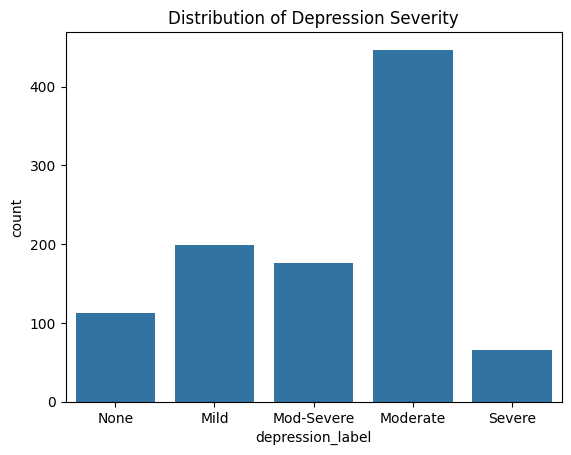

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
sns.countplot(x='depression_label', data=df)
plt.title("Distribution of Depression Severity")
plt.show()

plt.figure(figsize=(10,6))


In [ ]:
import warnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Filter out specific UserWarnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.impute._base')


# Map string values to numerical values for relevant columns
sleep_duration_map = {
    'Less than 2 hours': 1,
    '2–4 hours': 2,
    '4–6 hours': 3,
    '6–8 hours': 4,
    'More than 8 hours': 5
}

study_hours_map = {
    'Less than 2 hours': 1,
    '2–4 hours': 2,
    '4–6 hours': 3,
    'More than 6 hours': 4
}

work_stress_map = {
    'Never': 1,
    'Rarely': 2,
    'Sometimes': 3,
    'Often': 4,
    'Always': 5
}

financial_stress_map = {
    'Not at all': 1,
    'Rarely': 2,
    'Sometimes': 3,
    'Often': 4,
    'Always': 5
}

df['sleep_duration'] = df['sleep_duration'].map(sleep_duration_map)
df['study_hours'] = df['study_hours'].map(study_hours_map)
df['work_stress'] = df['work_stress'].map(work_stress_map)
df['financial_stress'] = df['financial_stress'].map(financial_stress_map)

# Ensure all numeric features are indeed numeric, coercing errors to NaN
# This handles cases where values not in the map were not handled by fillna previously
# or if 'age' contains non-numeric strings.
for col in ['age', 'sleep_duration', 'study_hours', 'work_stress', 'financial_stress']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop 'phq_total' only if it exists
if 'phq_total' in df.columns:
    df = df.drop(columns=['phq_total'])
X = df.drop(columns=['depression_label'])
y = df['depression_label']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


categorical_features = ['gender','employment_status','job_satisfaction','diet_quality',
                        'family_history','selfharm_history']
numeric_features = ['age','sleep_duration','study_hours','work_stress','financial_stress']

# Create imputers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Use median for numerical imputation
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Use most frequent for categorical imputation
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Define all models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42),
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'NaiveBayes': GaussianNB(),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'MLPClassifier': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

# Redefine the numerical transformer (same as original, to ensure self-contained fix)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Redefine the categorical transformer, setting sparse_output=False for OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Redefine the preprocessor with the updated categorical transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns if any, though all should be handled by now
)

results = {}

# Train & evaluate with cross-validation
for name, clf in models.items():
    pipe = Pipeline(steps=[('preproc', preprocessor), ('clf', clf)])
    scores = cross_val_score(pipe, X, y_encoded, cv=5, scoring='f1_macro')
    results[name] = (scores.mean(), scores.std())

# Convert results to arrays for plotting
model_names = list(results.keys())
f1_means = [results[m][0] for m in model_names]
f1_stds = [results[m][1] for m in model_names]



In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


accuracy_results = {}

for name, clf in models.items():
    pipe = Pipeline(steps=[('preproc', preprocessor), ('clf', clf)])
    scores = cross_val_score(pipe, X, y_encoded, cv=5, scoring='accuracy')
    accuracy_results[name] = [scores.mean(), scores.std()]


accuracy_df = pd.DataFrame(accuracy_results, index=["Mean Accuracy", "Std Deviation"]).T
accuracy_df

,Mean Accuracy,Std Deviation
LogisticRegression,0.912045,0.025295
RandomForest,0.776219,0.025806
XGBoost,0.797214,0.021472
DecisionTree,0.664393,0.035612
SVM,0.881070,0.036481
KNN,0.703318,0.058239
NaiveBayes,0.474383,0.132486
GradientBoosting,0.787224,0.018462
MLPClassifier,0.707219,0.058208



Best Model After Cross-Validation: LogisticRegression

Classification Report (Test Set):
              precision    recall  f1-score   support

        Mild       0.95      0.93      0.94        40
  Mod-Severe       0.91      0.91      0.91        35
    Moderate       0.96      1.00      0.98        90
        None       1.00      0.91      0.95        23
      Severe       0.83      0.77      0.80        13

    accuracy                           0.95       201
   macro avg       0.93      0.90      0.92       201
weighted avg       0.95      0.95      0.94       201



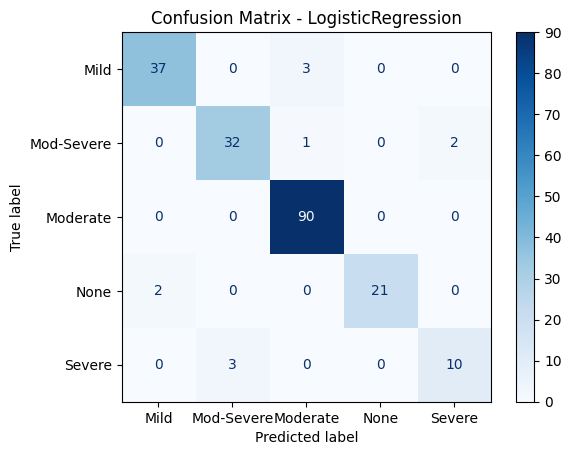

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


best_model_name = max(results, key=lambda x: results[x][0])
best_model = models[best_model_name]

print(f"\nBest Model After Cross-Validation: {best_model_name}")

pipe = Pipeline(steps=[('preproc', preprocessor), ('clf', best_model)])
pipe.fit(X_train, y_train)


y_pred = pipe.predict(X_test)


print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues", values_format='d')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()






ROC Curve


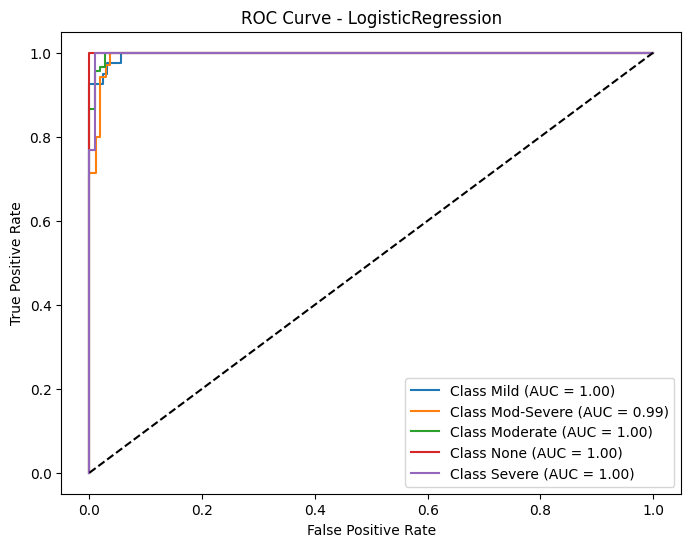

In [ ]:
# Binarize labels for ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_encoded))
n_classes = y_test_bin.shape[1]

# Predict probabilities
try:
    y_score = pipe.predict_proba(X_test)

    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve - {best_model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

except:
    print("\nROC Curve skipped: model does not support predict_proba().")

Distribution of PHQ-9 Total Scores

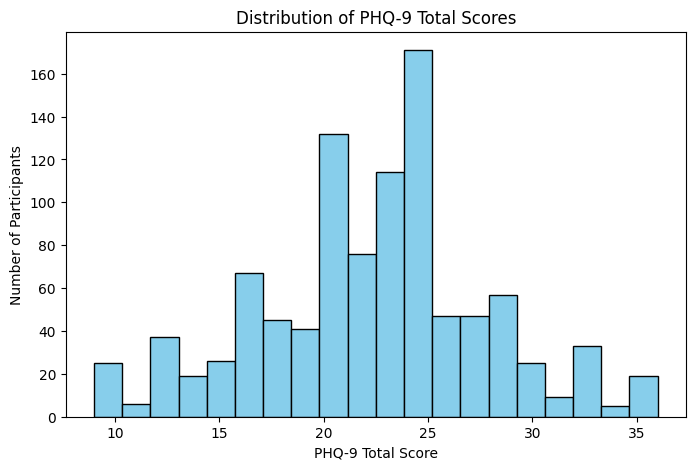

In [ ]:
# Recalculate phq_total, as it was dropped earlier for model training
phq_items = [f"q{i}_{col}" for i, col in enumerate(
    ["interest","depressed","sleep","energy","appetite","selfworth","focus","activity","suicidal"], 1)]
df['phq_total'] = df[phq_items].sum(axis=1)

plt.figure(figsize=(8,5))
plt.hist(df['phq_total'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of PHQ-9 Total Scores")
plt.xlabel("PHQ-9 Total Score")
plt.ylabel("Number of Participants")
plt.show()

Depression Severity Distribution

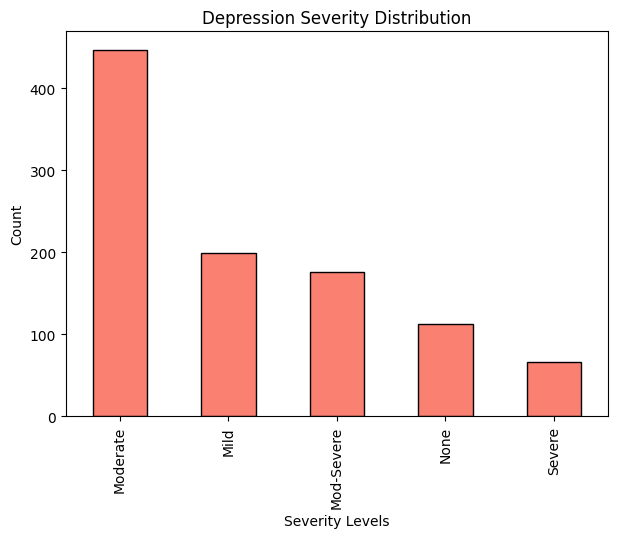

In [ ]:
plt.figure(figsize=(7,5))
df['depression_label'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Depression Severity Distribution")
plt.xlabel("Severity Levels")
plt.ylabel("Count")
plt.show()


Gender vs Depression Severity

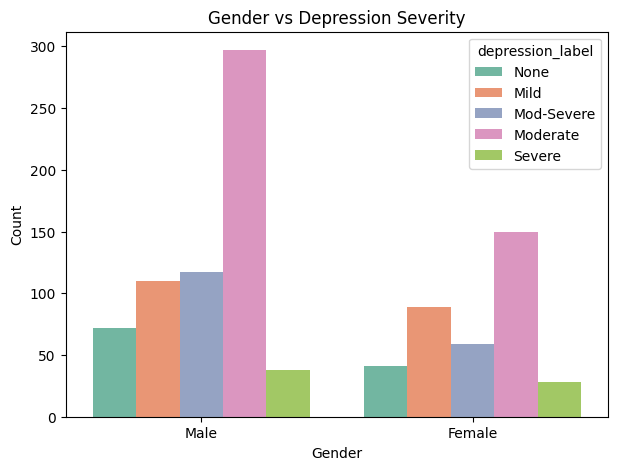

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='gender', hue='depression_label', palette='Set2')
plt.title("Gender vs Depression Severity")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


Sleep Duration vs Depression Score

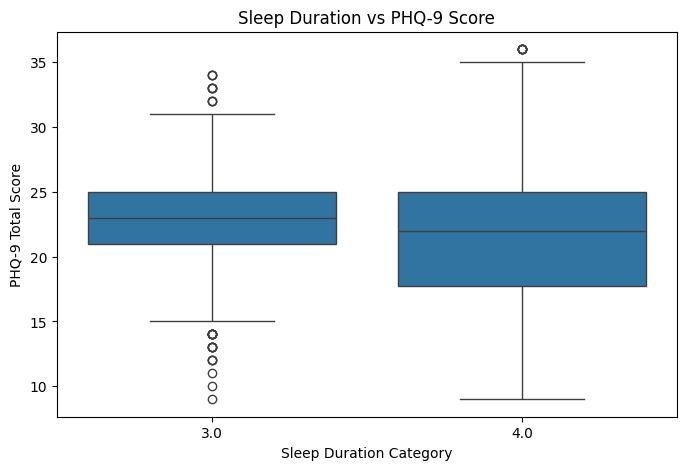

In [ ]:
plt.figure(figsize=(8,5))

# Apply the preprocessor to handle missing values in sleep_duration
# Need to create a temporary dataframe or apply inverse transform if needed
# A simpler approach for plotting is to drop NaNs for this specific plot
df_plot = df.dropna(subset=['sleep_duration'])

sns.boxplot(data=df_plot, x='sleep_duration', y='phq_total')
plt.title("Sleep Duration vs PHQ-9 Score")
plt.xlabel("Sleep Duration Category")
plt.ylabel("PHQ-9 Total Score")
plt.show()

Correlation Heatmap (Numerical Features)

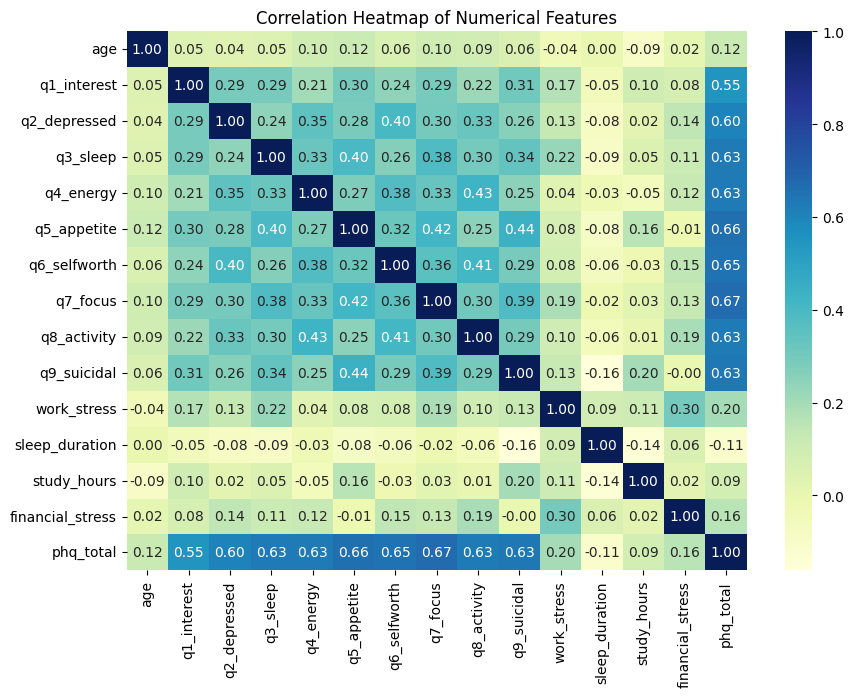

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


Employment Status vs Depression Severity

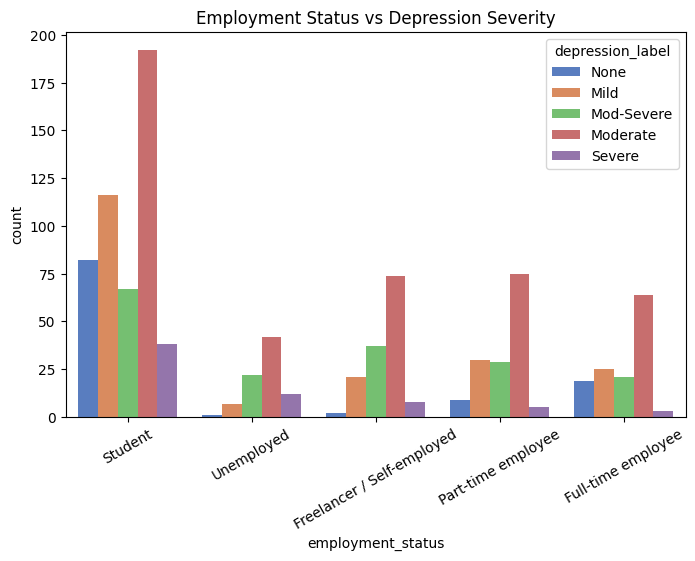

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='employment_status', hue='depression_label', palette='muted')
plt.title("Employment Status vs Depression Severity")
plt.xticks(rotation=30)
plt.show()


Model Comparison (from previous step)

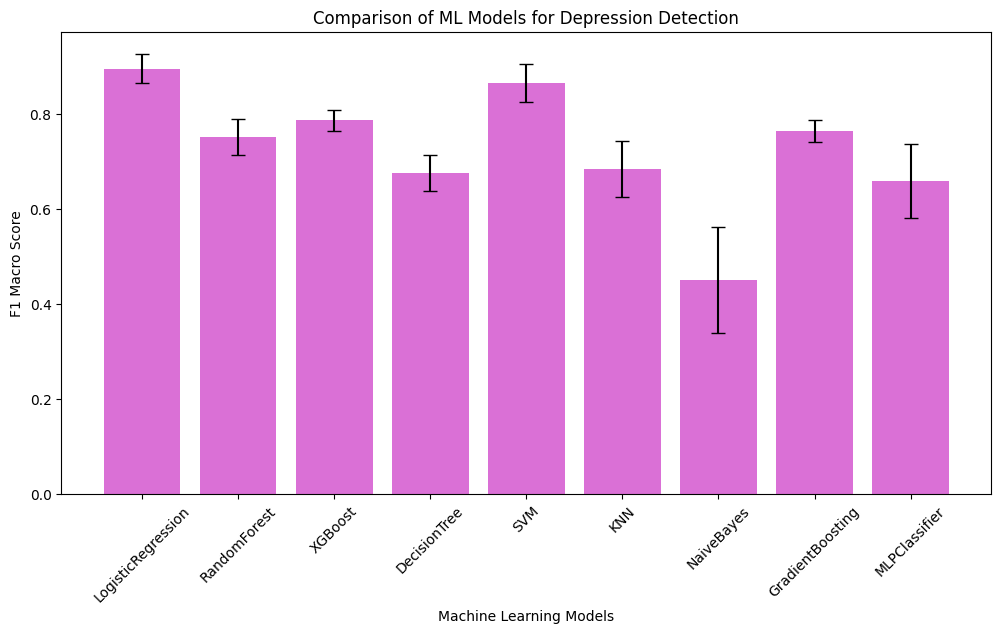

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(model_names, f1_means, yerr=f1_stds, capsize=5, color='orchid')
plt.ylabel("F1 Macro Score")
plt.xlabel("Machine Learning Models")
plt.title("Comparison of ML Models for Depression Detection")
plt.xticks(rotation=45)
plt.show()


In [ ]:
import joblib

# The 'pipe' object contains the preprocessor and the best model
# (Logistic Regression in this case as determined by cross-validation)

# Define the filename for the pickled model
model_filename = 'depression_detection_model.pkl'

# Save the pipeline to a pickle file
joblib.dump(pipe, model_filename)

print(f"Model saved successfully as {model_filename}")

Model saved successfully as depression_detection_model.pkl
